In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

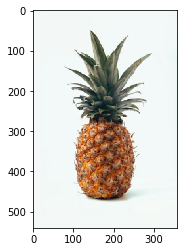

In [2]:
# Load the image
img = cv2.imread('pine_apple.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)

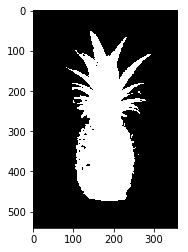

In [3]:
# Blurring for removing the noise 
img_blur = cv2.bilateralFilter(img, d = 7, 
                               sigmaSpace = 75, sigmaColor =75)
# Convert to grayscale 
img_gray = cv2.cvtColor(img_blur, cv2.COLOR_RGB2GRAY)
# Apply the thresholding
a = img_gray.max()  
_, thresh = cv2.threshold(img_gray, a/2+60, a,cv2.THRESH_BINARY_INV)
plt.imshow(thresh, cmap = 'gray')

In [4]:
# Find the contour of the figure 
contours, hierarchy = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

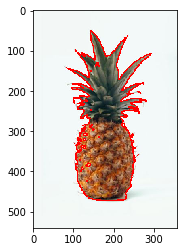

In [5]:
# Sort the contours 
contours = sorted(contours, key = cv2.contourArea, reverse = True)
# Draw the contour 
img_copy = img.copy()
final = cv2.drawContours(img_copy, contours, contourIdx = -1, 
                         color = (255, 0, 0), thickness = 2)
plt.imshow(img_copy)

In [6]:
# The first order of the contours
c_0 = contours[0]
# image moment
M = cv2.moments(c_0)
print(M.keys())

dict_keys(['nu11', 'nu20', 'mu02', 'mu03', 'nu03', 'm02', 'm10', 'm03', 'nu30', 'mu20', 'm21', 'm30', 'm01', 'mu11', 'mu30', 'mu12', 'nu21', 'm00', 'mu21', 'm11', 'nu02', 'm20', 'm12', 'nu12'])


In [7]:
# The area of contours 
print("1st Contour Area : ", cv2.contourArea(contours[0])) # 37544.5
print("2nd Contour Area : ", cv2.contourArea(contours[1])) # 75.0
print("3rd Contour Area : ", cv2.contourArea(contours[2])) # 54.0

1st Contour Area :  44140.0
2nd Contour Area :  63.0
3rd Contour Area :  60.5


In [8]:
# The arc length of contours 
print(cv2.arcLength(contours[0], closed = True))      # 2473.3190
print(cv2.arcLength(contours[0], closed = False))     # 2472.3190

2489.5373505353928
2488.5373505353928


In [9]:
# The centroid point
cx = int(M['m10'] / M['m00'])
cy = int(M['m01'] / M['m00'])

In [10]:
# The extreme points
l_m = tuple(c_0[c_0[:, :, 0].argmin()][0])
r_m = tuple(c_0[c_0[:, :, 0].argmax()][0])
t_m = tuple(c_0[c_0[:, :, 1].argmin()][0])
b_m = tuple(c_0[c_0[:, :, 1].argmax()][0])
pst = [l_m, r_m, t_m, b_m]
xcor = [p[0] for p in pst]
ycor = [p[1] for p in pst]

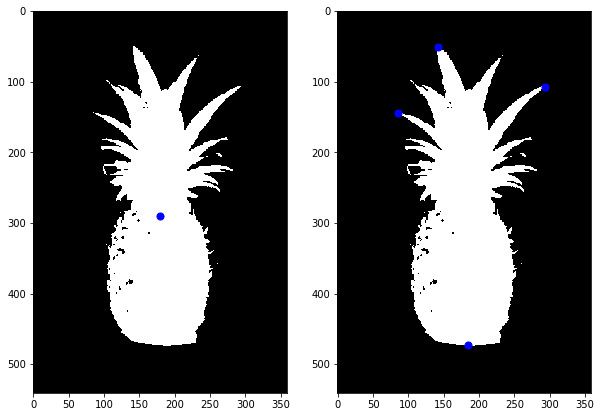

In [11]:
# Plot the points
plt.figure(figsize = (10, 16))
plt.subplot(1, 2, 1)
plt.imshow(thresh, cmap = 'gray')
plt.scatter([cx], [cy], c = 'b', s = 50)
plt.subplot(1, 2, 2)
plt.imshow(thresh, cmap = 'gray')
plt.scatter(xcor, ycor, c = 'b', s = 50)

In [12]:
# The first order of the contours
c_0 = contours[0]
# Get the 4 points of the bounding rectangle
x, y, w, h = cv2.boundingRect(c_0)
# Draw a straight rectangle with the points
img_copy = img.copy()
img_box = cv2.rectangle(img_copy, (x, y), (x+w, y+h), color = (255, 0, 0), thickness = 2)

In [13]:
# Get the 4 points of the bounding rectangle with the minimum area
rect = cv2.minAreaRect(c_0)
box = cv2.boxPoints(rect)
box = box.astype('int')
# Draw a contour with the points 
img_copy = img.copy()
img_box_2 = cv2.drawContours(img_copy, contours = [box], 
                             contourIdx = -1, 
                             color = (255, 0, 0), thickness = 2)

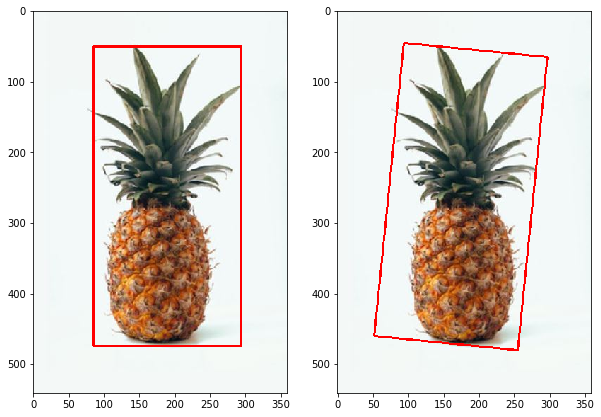

In [14]:
plt.figure(figsize = (10, 16))
plt.subplot(1, 2, 1); plt.imshow(img_box)
plt.subplot(1, 2, 2); plt.imshow(img_box_2)

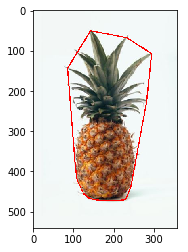

In [15]:
# Detect the convex contour
hull = cv2.convexHull(c_0)
img_copy = img.copy()
img_hull = cv2.drawContours(img_copy, contours = [hull], 
                            contourIdx = 0, 
                            color = (255, 0, 0), thickness = 2)
plt.imshow(img_hull)

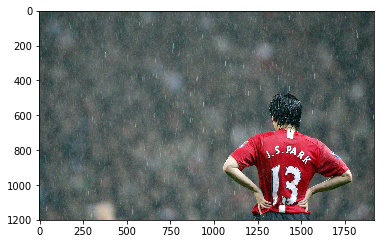

In [16]:
# Import the large image
backpacker = cv2.imread('back.jpg')
backpacker = cv2.cvtColor(backpacker, cv2.COLOR_BGR2RGB)
plt.imshow(backpacker)

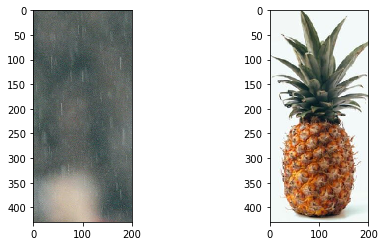

In [20]:
# Crop the small image and the roi
roi = backpacker[770:1200, 300:500]
img_2 = img[50:480, 80:280]
plt.figure(figsize = (6, 6))
plt.subplot(1, 3, 1); plt.imshow(roi)
plt.subplot(1, 3, 3); plt.imshow(img_2)

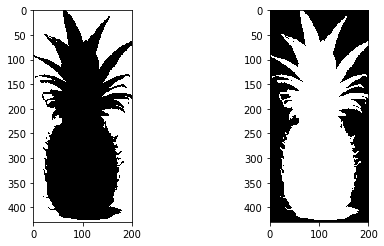

In [21]:
# Creating the mask for the roi and small image
img_gray = cv2.cvtColor(img_2, cv2.COLOR_RGB2GRAY)
_, mask = cv2.threshold(img_gray, 254/2+100, 255, cv2.THRESH_BINARY)
mask_inv = cv2.bitwise_not(mask)
plt.figure(figsize = (6, 6))
plt.subplot(1, 3, 1); plt.imshow(mask, cmap = 'gray')
plt.subplot(1, 3, 3); plt.imshow(mask_inv, cmap = 'gray')

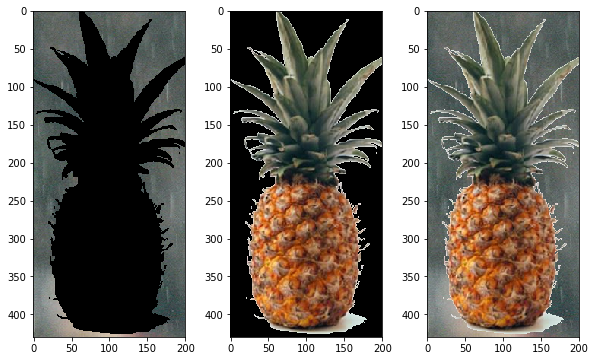

In [22]:
# Masking 
img_bg = cv2.bitwise_and(roi, roi, mask = mask)
img_fg = cv2.bitwise_and(img_2, img_2, mask = mask_inv)
dst = cv2.add(img_fg, img_bg)
plt.figure(figsize = (10, 6))
plt.subplot(1, 3, 1); plt.imshow(img_bg)
plt.subplot(1, 3, 2); plt.imshow(img_fg)
plt.subplot(1, 3, 3); plt.imshow(dst)

In [23]:
# Final output
backpacker[770:1200, 300:500] = dst
display(backpacker)

array([[[75, 88, 81],
        [77, 86, 83],
        [85, 84, 89],
        ...,
        [53, 65, 61],
        [52, 63, 59],
        [55, 66, 62]],

       [[75, 88, 81],
        [86, 97, 93],
        [82, 87, 90],
        ...,
        [46, 65, 61],
        [46, 62, 59],
        [45, 61, 58]],

       [[65, 80, 73],
        [81, 96, 91],
        [77, 92, 89],
        ...,
        [46, 60, 60],
        [52, 66, 66],
        [57, 71, 71]],

       ...,

       [[73, 79, 79],
        [61, 67, 67],
        [67, 71, 72],
        ...,
        [73, 83, 84],
        [76, 86, 87],
        [66, 76, 75]],

       [[72, 82, 81],
        [64, 73, 72],
        [67, 73, 73],
        ...,
        [65, 75, 76],
        [65, 77, 75],
        [56, 68, 66]],

       [[76, 88, 86],
        [73, 83, 82],
        [68, 77, 76],
        ...,
        [70, 82, 82],
        [73, 85, 83],
        [69, 81, 77]]], dtype=uint8)